In [ ]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks") 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
direccion = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
archivo_tintos = direccion + 'winequality-red.csv'
red_wine = pd.read_csv(archivo_tintos, sep=';')

archivo_blancos = direccion + 'winequality-white.csv'
white_wine = pd.read_csv(archivo_blancos, sep=';')


In [ ]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

In [ ]:
red_wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
red_wine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.describe() 

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [ ]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

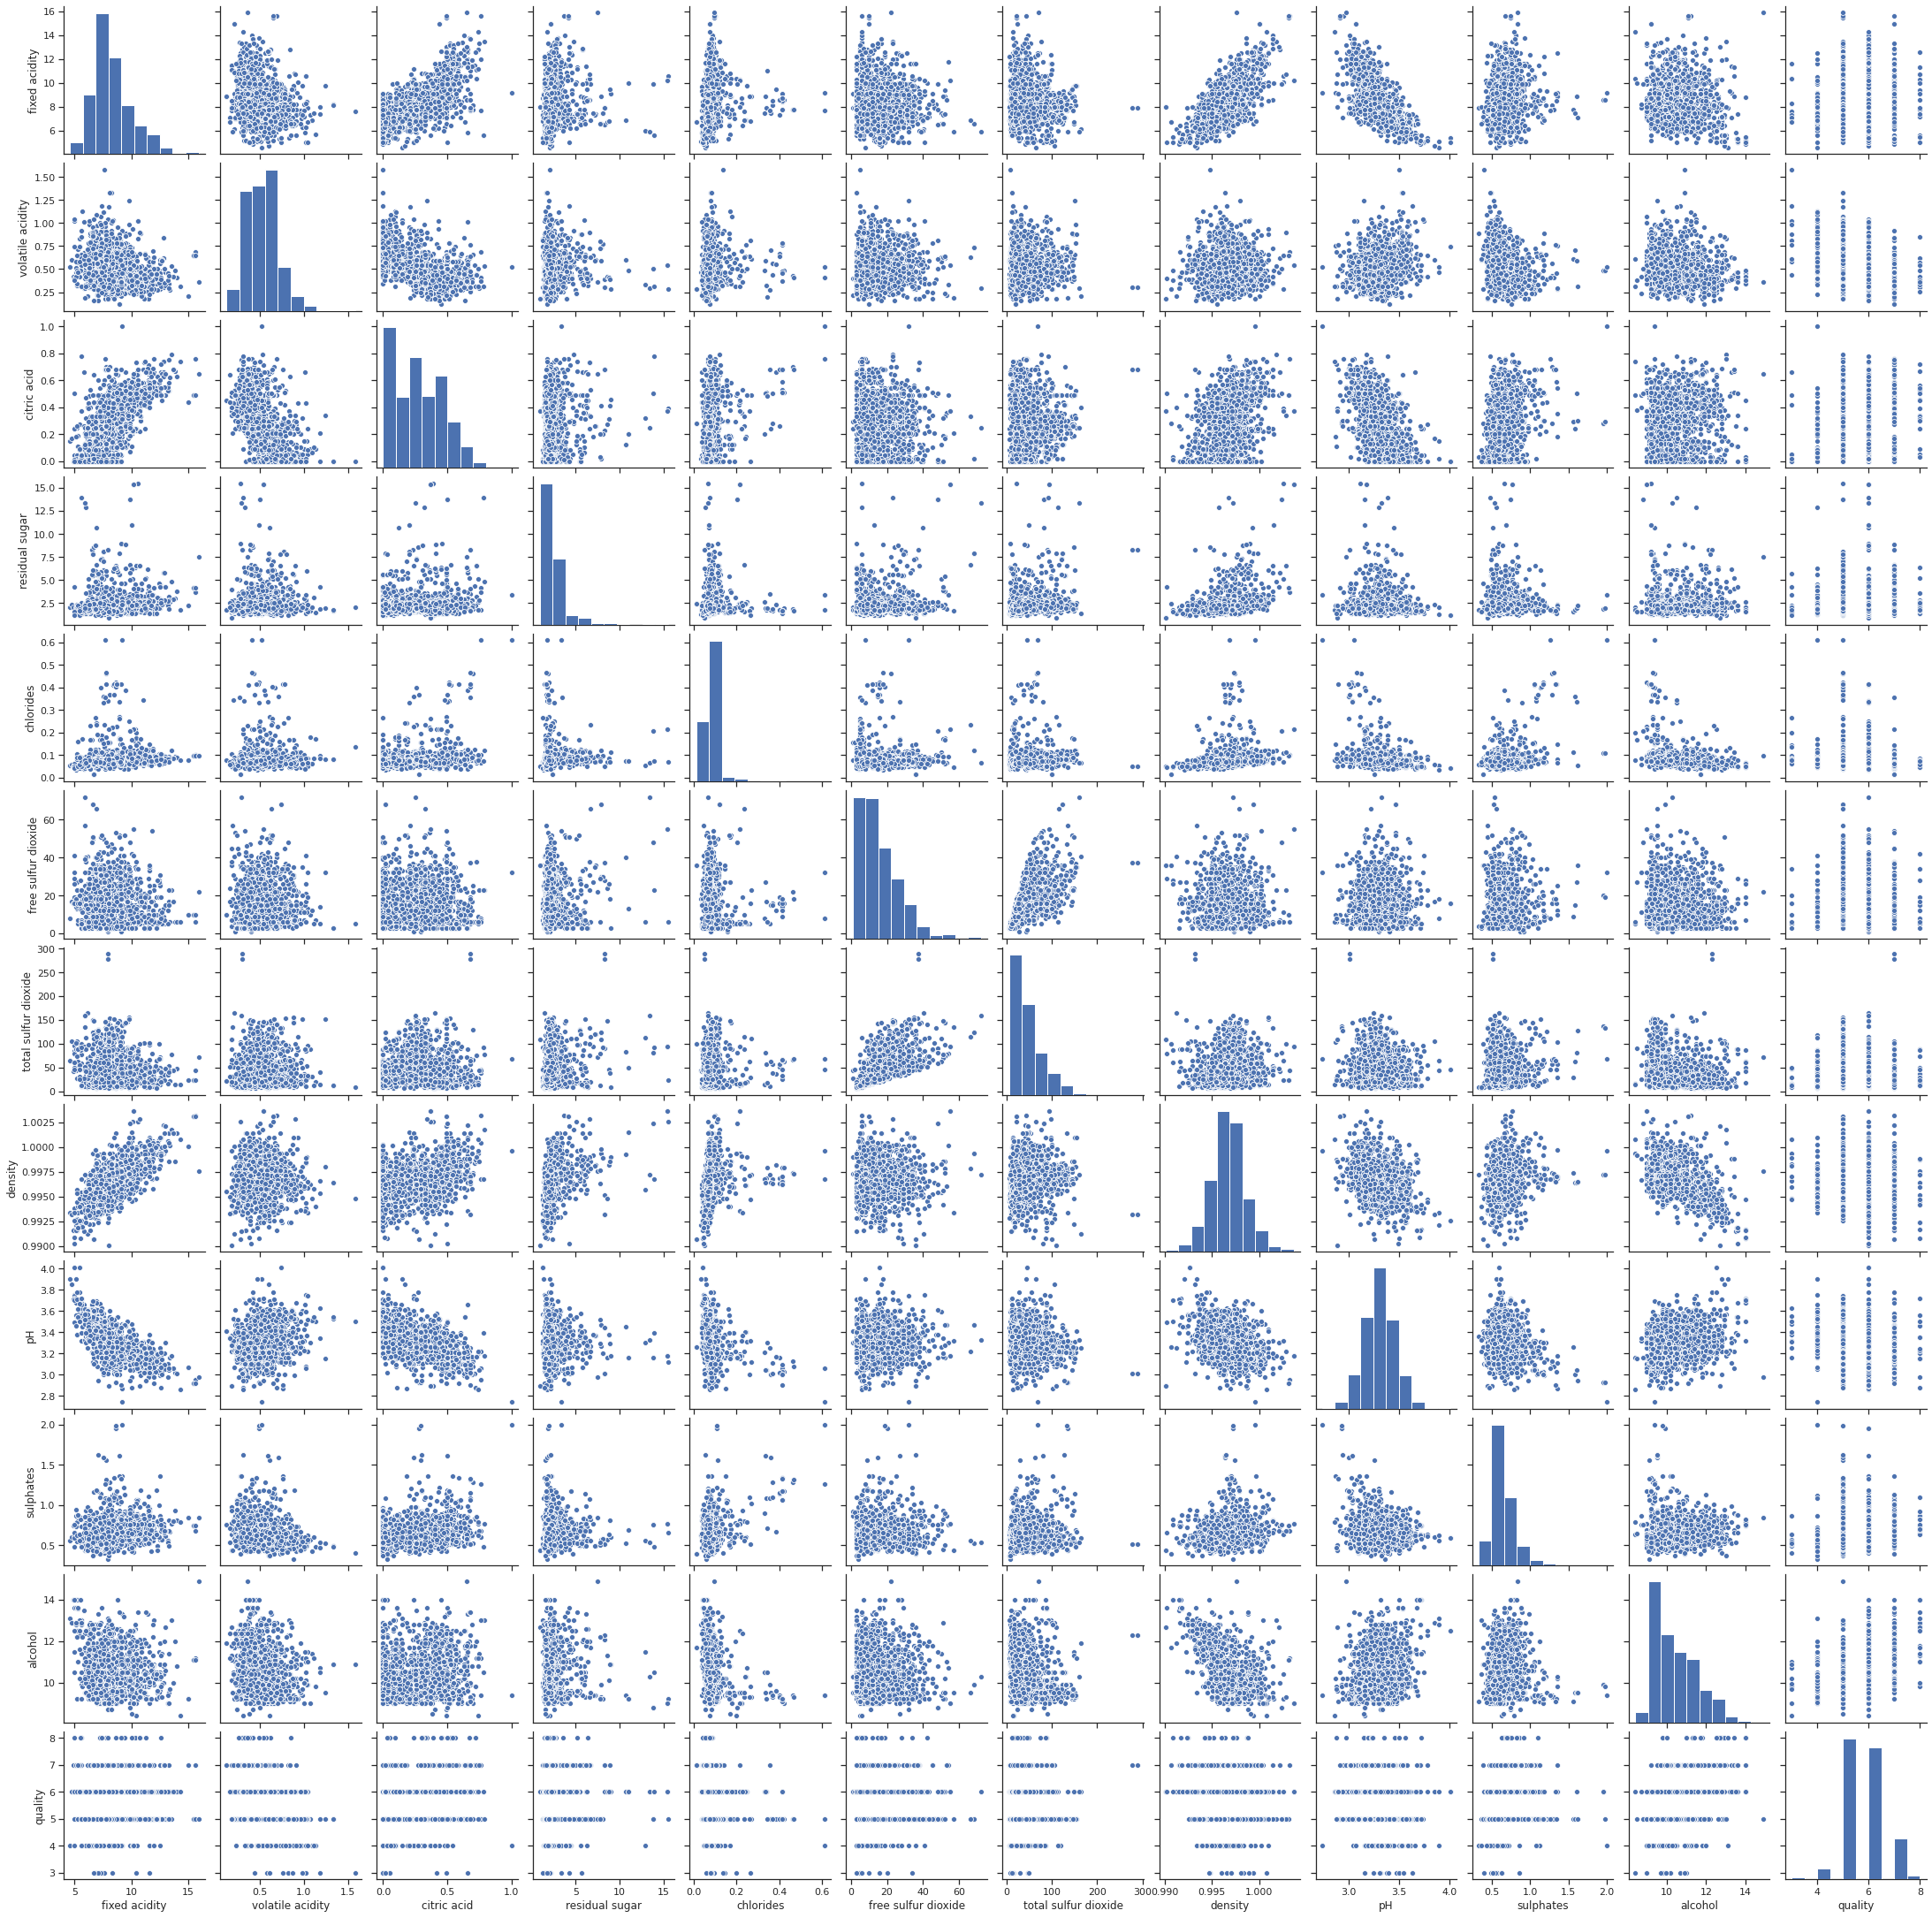

In [ ]:
sns.pairplot(red_wine, hue=None)
plt.show()

density y fixed acidity tenian una relacion linea... y que serian estas que se utilizarn para realizar el modelo....

In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white_wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

In [ ]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

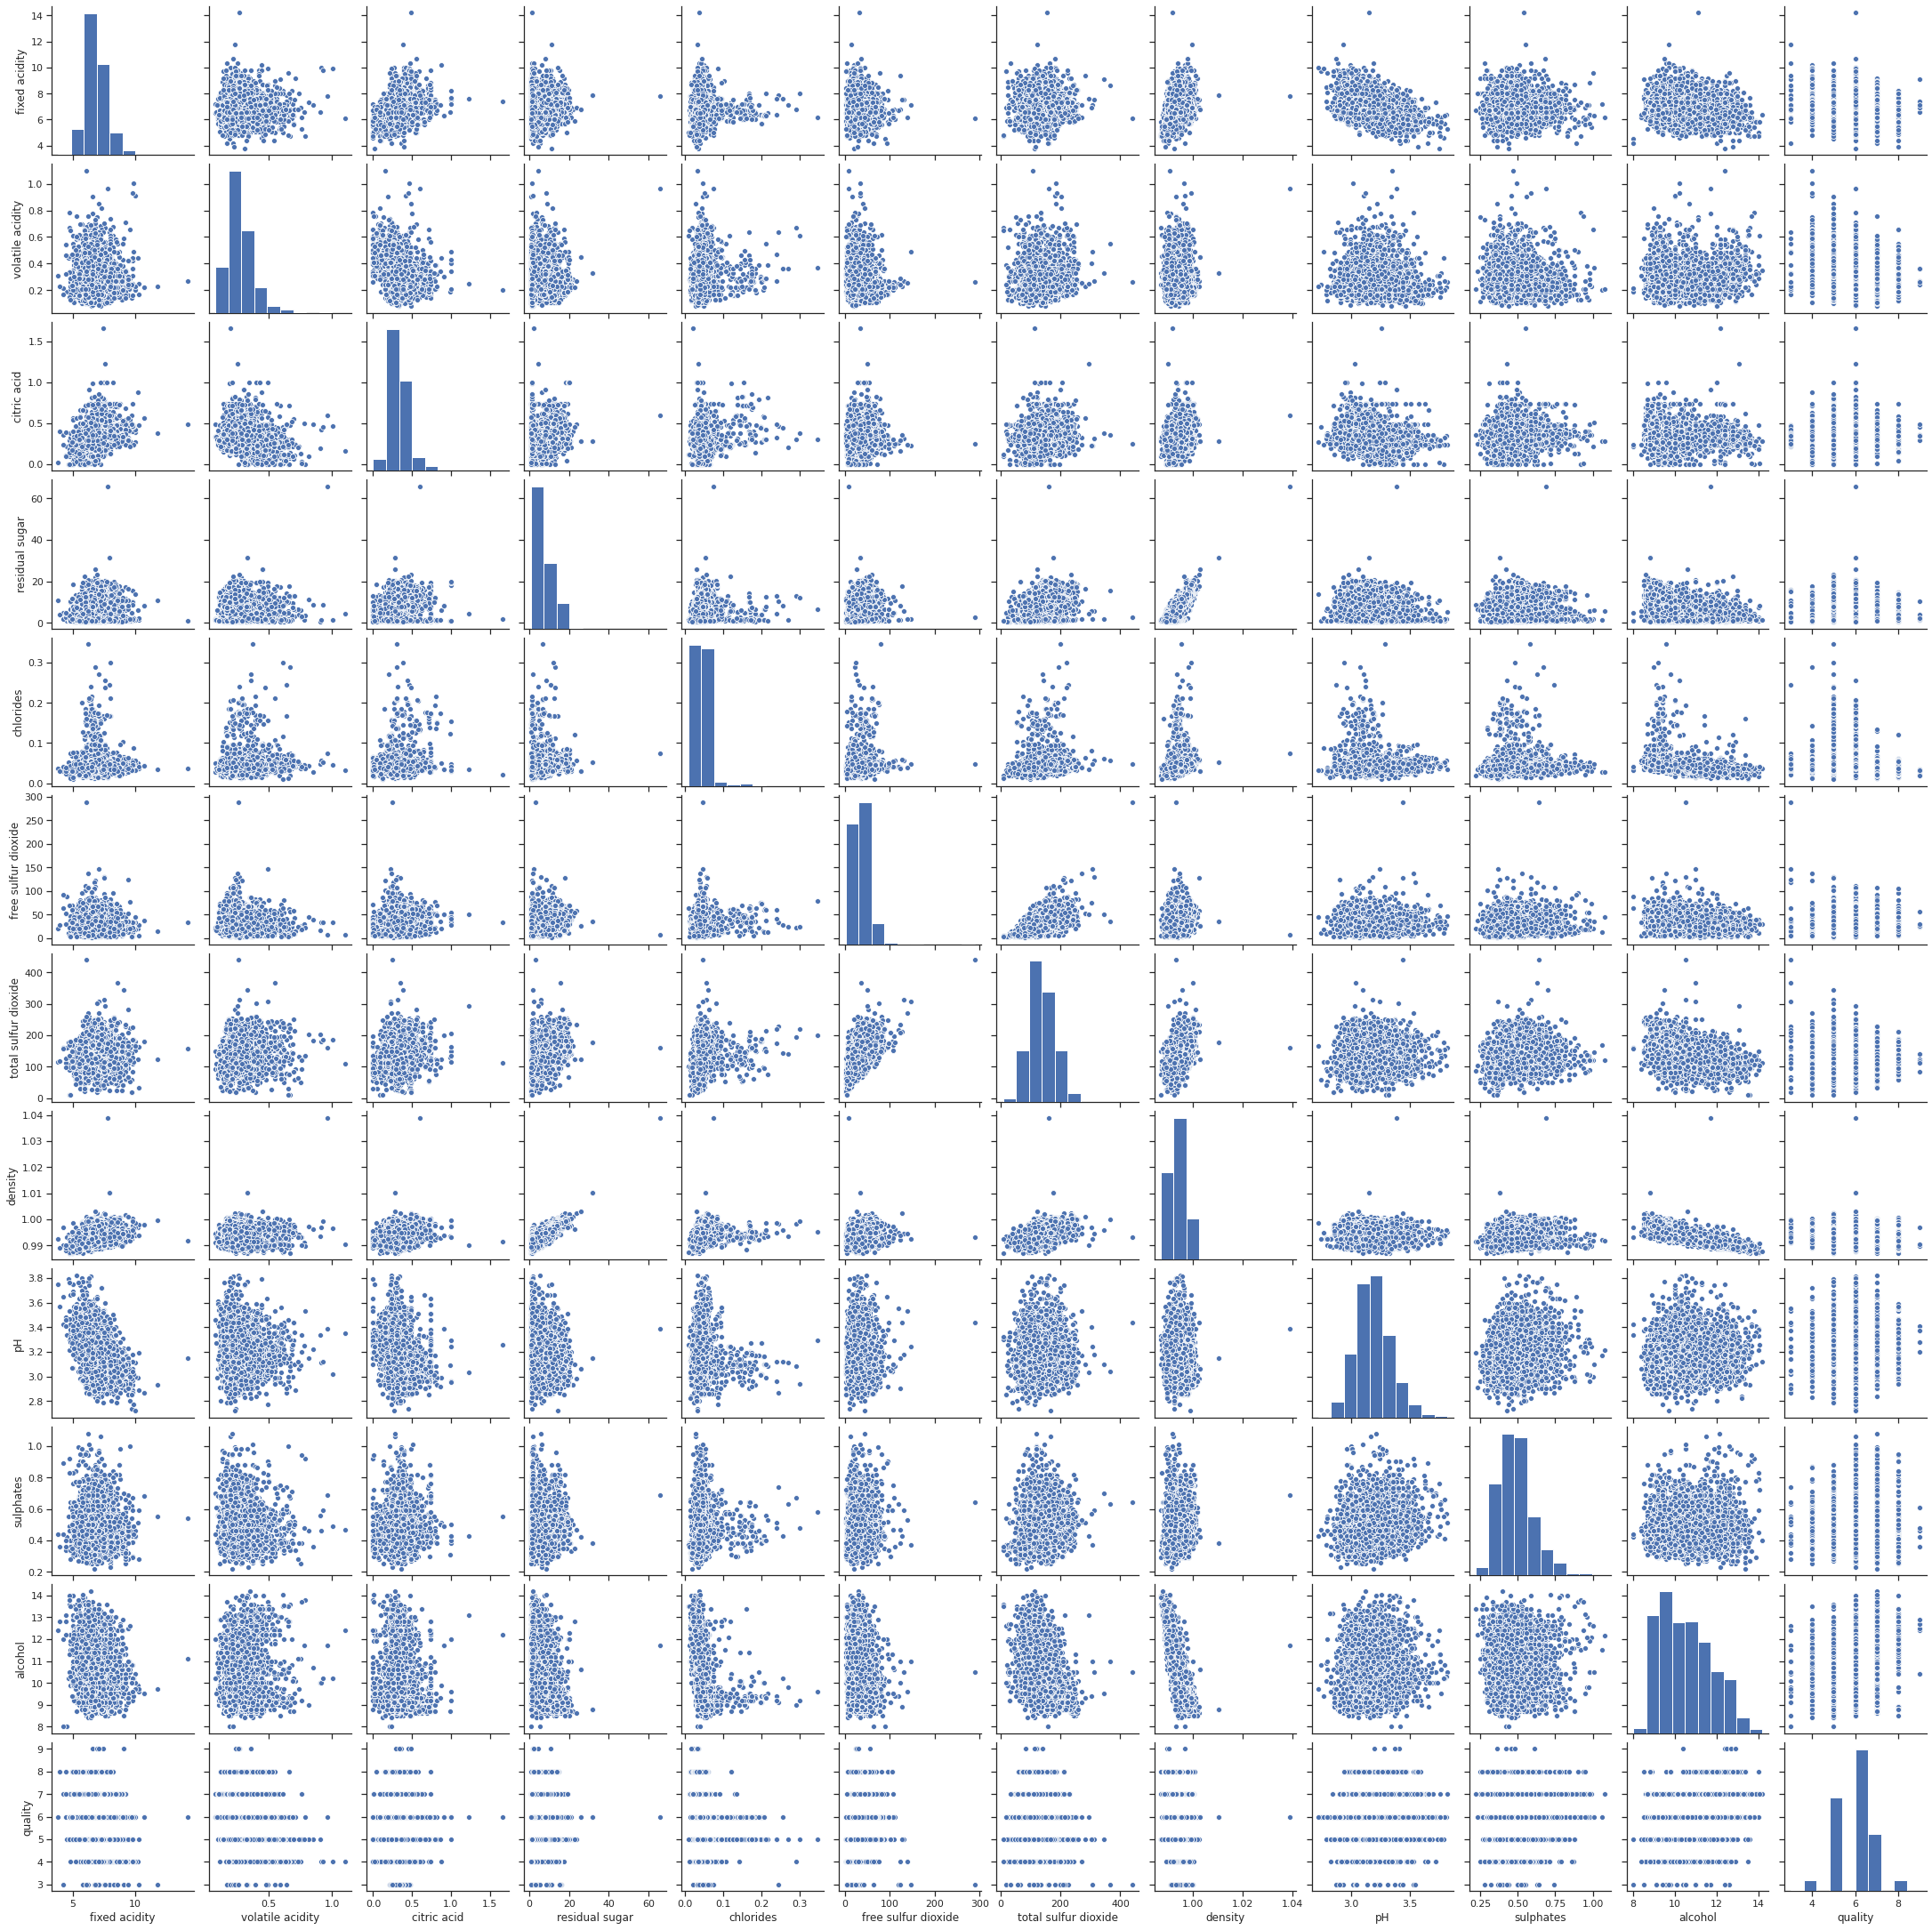

In [ ]:
sns.pairplot(white_wine, hue=None)
plt.show()


In [ ]:
red_analysis = pd.DataFrame(data=red_wine, 
                            columns = ['density', 'fixed acidity', 
                                       'quality', 'residual sugar', 'alcohol'])
red_analysis.head()


density  fixed acidity  quality  residual sugar  alcohol
0   0.9978            7.4        5             1.9      9.4
1   0.9968            7.8        5             2.6      9.8
2   0.9970            7.8        5             2.3      9.8
3   0.9980           11.2        6             1.9      9.8
4   0.9978            7.4        5             1.9      9.4

In [ ]:
white_analysis = pd.DataFrame(data=white_wine, 
                              columns = ['density', 'fixed acidity', 
                                          'quality', 'residual sugar', 'alcohol'])
white_analysis.head()


density  fixed acidity  quality  residual sugar  alcohol
0   1.0010            7.0        6            20.7      8.8
1   0.9940            6.3        6             1.6      9.5
2   0.9951            8.1        6             6.9     10.1
3   0.9956            7.2        6             8.5      9.9
4   0.9956            7.2        6             8.5      9.9

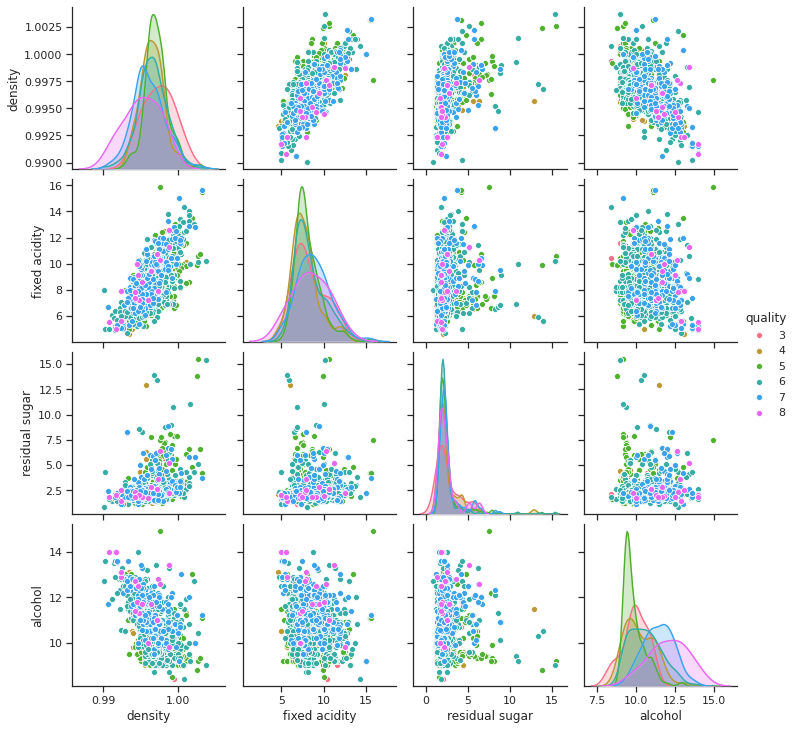

In [ ]:
  sns.pairplot(red_analysis, hue='quality',palette="husl") 
plt.show()


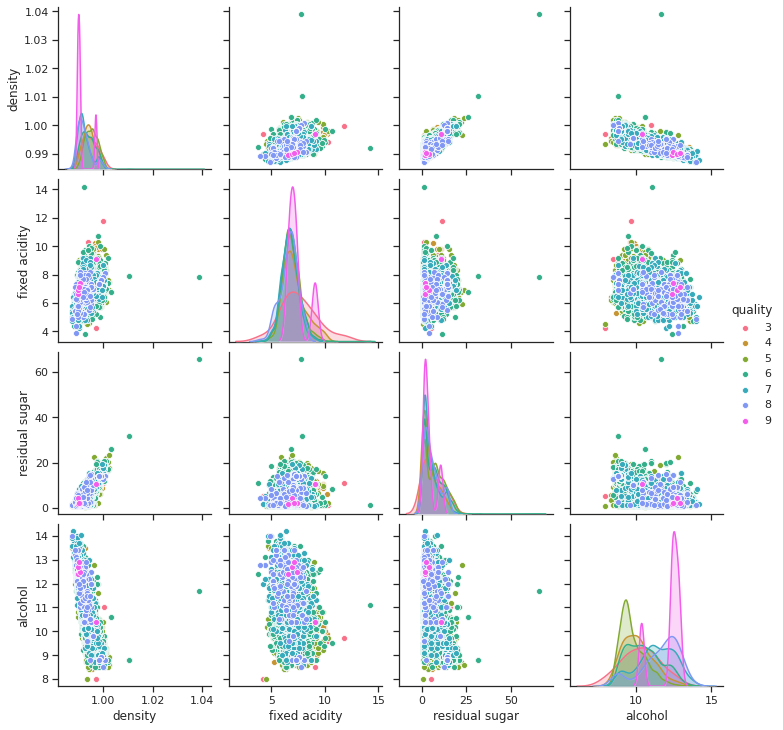

In [ ]:
sns.pairplot(white_analysis, hue='quality',palette="husl")
plt.show()


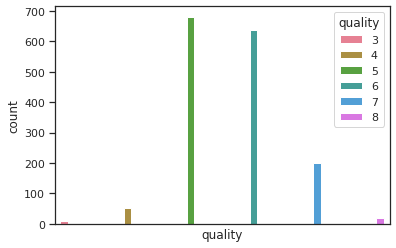

In [ ]:
sns.countplot(x="quality", data=red_analysis,hue = 'quality', palette="husl")
plt.xticks([])
plt.show()


In [ ]:
red_5 = pd.DataFrame(data=red_analysis[red_analysis.quality==5], 
                     columns=['density', 'fixed acidity'])
red_6 = pd.DataFrame(data=red_analysis[red_analysis.quality==6], 
                     columns=['density', 'fixed acidity'])
red_7 = pd.DataFrame(data=red_analysis[red_analysis.quality==7], 
                     columns=['density', 'fixed acidity'])


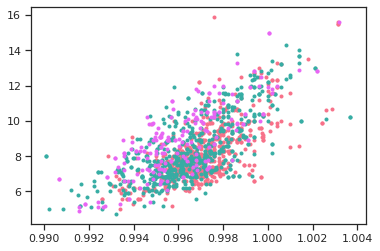

In [ ]:
colores = sns.color_palette(palette='husl', n_colors=6, desat=None)
plt.plot(red_5['density'],red_5['fixed acidity'], '.', color = colores[0], label='5')
plt.plot(red_6['density'],red_6['fixed acidity'], '.', color = colores[3], label='6')
plt.plot(red_7['density'],red_7['fixed acidity'], '.', color = colores[5], label='7')
plt.show()


In [ ]:
def minimos_cuadrados(x,y):  
    m = len(x) #len() mide el largo del vector
    sumax = np.sum(x)
    sumay = np.sum(y)
    sumax2 = np.sum(x**2) # cada termino al cuadrado se suma
    sumaxy = np.dot(x,y) # producto punto entre x e y
    a = (m*sumaxy - sumax*sumay) / (m*sumax2 - sumax**2)
    b = (sumax2*sumay - sumaxy*sumax) / (m*sumax2 - sumax**2)
    return a,b


In [ ]:
a5,b5 = minimos_cuadrados(red_5['density'],red_5['fixed acidity'])
a6,b6 = minimos_cuadrados(red_6['density'],red_6['fixed acidity'])
a7,b7 = minimos_cuadrados(red_7['density'],red_7['fixed acidity'])

x = np.linspace(0.980,1.005,101)
y5 = a5*x + b5 
y6 = a6*x + b6
y7 = a7*x + b7


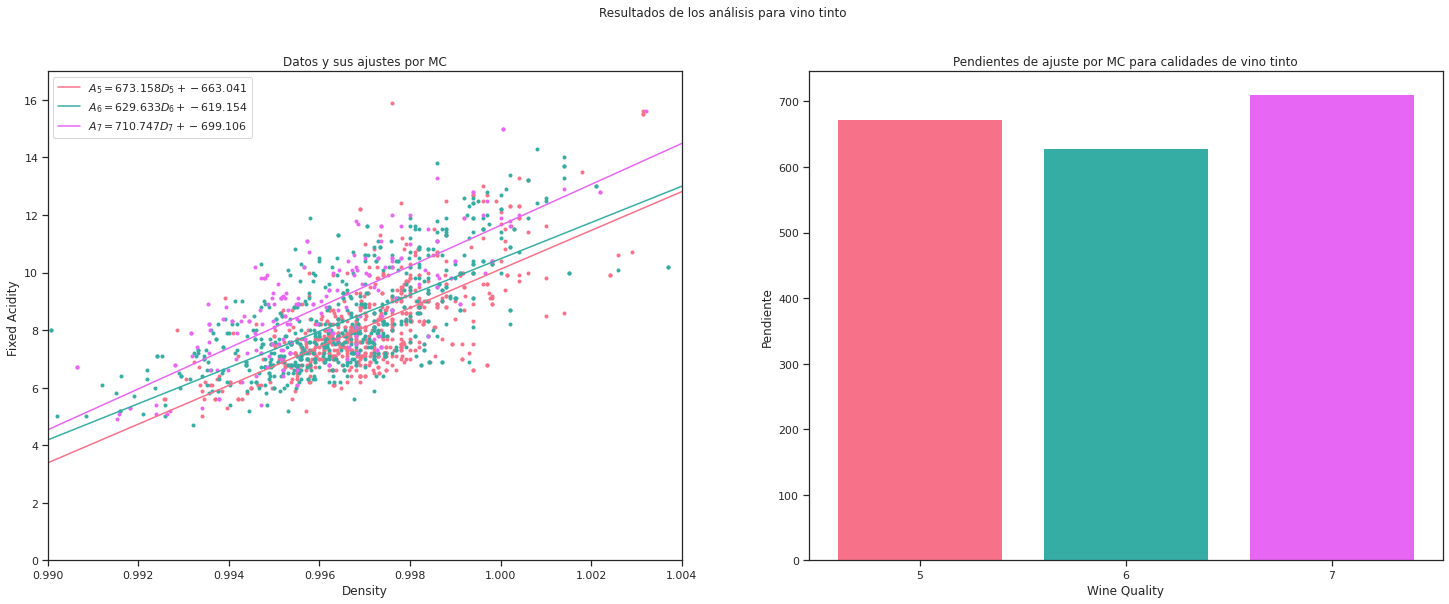

In [ ]:
plt.figure(figsize=(25,9))
plt.suptitle("Resultados de los análisis para vino tinto")
plt.subplot(121) 
plt.title('Datos y sus ajustes por MC')
plt.plot(red_5['density'],red_5['fixed acidity'], '.', color = colores[0], label='')
plt.plot(red_6['density'],red_6['fixed acidity'], '.', color = colores[3],label='')
plt.plot(red_7['density'],red_7['fixed acidity'], '.', color = colores[5],label='')
plt.plot(x,y5, '-', color = colores[0],label='$A_5 = %0.3f D_5+ %0.3f $'%(a5,b5))
plt.plot(x,y6, '-', color = colores[3],label='$A_6 = %0.3f D_6+ %0.3f $'%(a6,b6))
plt.plot(x,y7, '-', color = colores[5],label='$A_7 = %0.3f D_7+ %0.3f $'%(a7,b7))
plt.xlabel('Density')
plt.ylabel('Fixed Acidity ')
plt.legend() 
plt.xlim(0.990,1.004)
plt.ylim(0,17)

plt.subplot(122)
plt.title('Pendientes de ajuste por MC para calidades de vino tinto')
plt.bar([5,6,7], [a5,a6,a7], color = [colores[0], colores[3], colores[5]])
plt.xlabel('Wine Quality')
plt.ylabel('Pendiente')
plt.xticks([5,6,7])
plt.show()
